<a href="https://colab.research.google.com/github/Omprakash977/Classification/blob/main/Cardiovascular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data description

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Variables

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

Data Description

Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV

# Importing the required libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score,log_loss,recall_score,f1_score,precision_score,classification_report
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Mounting the drive and reading the data

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/data_cardiovascular_risk.csv')

In [4]:
# Exploring the first five rows of the dataset
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# Exploring the last five rows of the dataset
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
# Inspecting the length and number of columns of the dataset
df.shape

(3390, 17)

In [7]:
# Checking null values and data types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
# finding statistical measures of numerical columns
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
# Checking null value count of each column
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [10]:
df[df.duplicated()].sum()

id                 0.0
age                0.0
education          0.0
sex                0.0
is_smoking         0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [11]:
df[df['cigsPerDay'].isnull()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,422,55,1.0,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,466,45,3.0,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,469,42,1.0,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,491,61,1.0,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,538,41,1.0,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,767,54,1.0,M,YES,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,1461,47,2.0,F,YES,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,1467,49,1.0,F,YES,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,1597,57,NaN,F,YES,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,1986,49,2.0,F,YES,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


# Exploratory data analysis

In [12]:
# Extracting names of numerical columns from the data
numeric_features = df.describe().columns[1:]

In [13]:
# Extracting names of categorical columns from the data
categorical_features = df.describe(include=['object','category']).columns

**Visualization of numeric features**

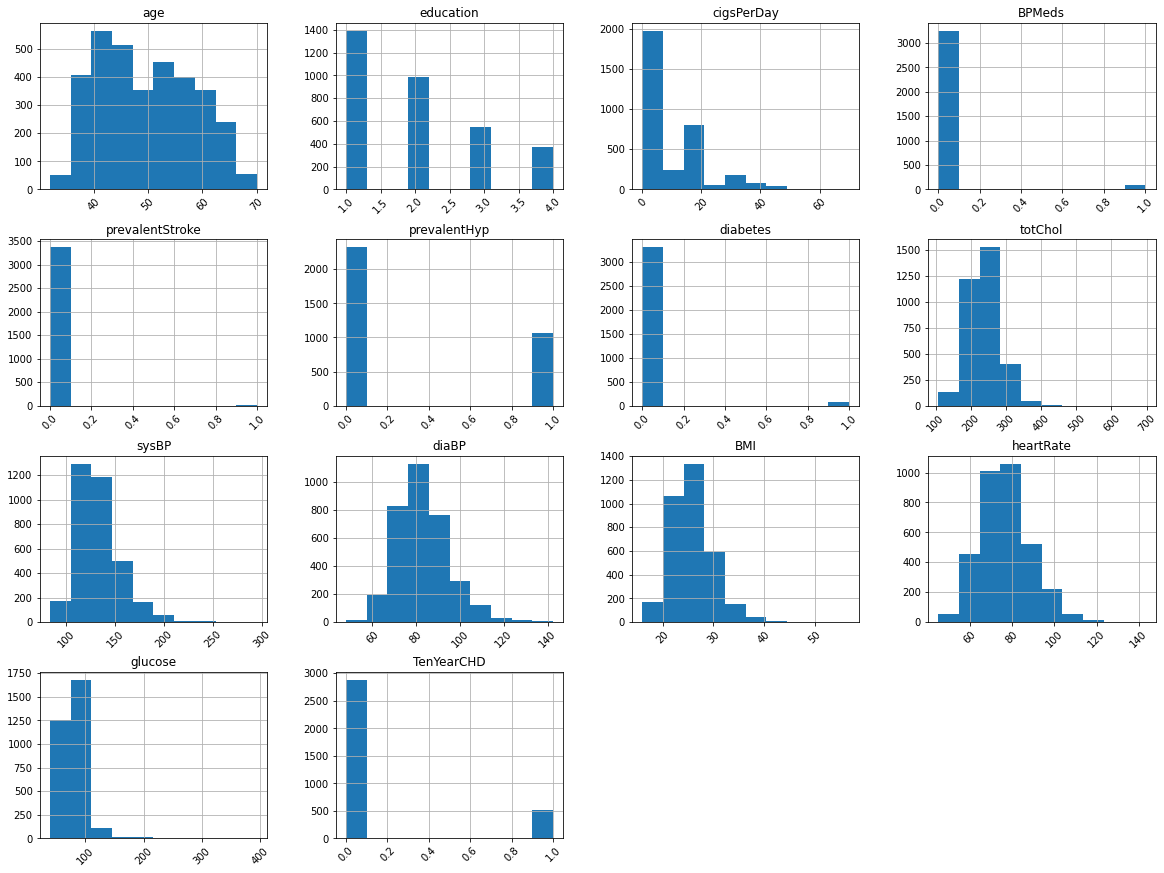

In [14]:
df.iloc[:,1:].hist(figsize=(20,15), xrot=45)
plt.show()

**Visulalization of categorical features**

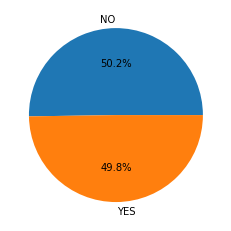

In [15]:
#Creating a pie chart
plt.pie(df['is_smoking'].value_counts(), labels=df['is_smoking'].value_counts().keys(),autopct='%.1f%%')
plt.show()

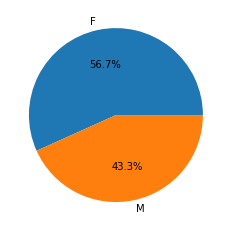

In [16]:
#Creating a pie chart
plt.pie(df['sex'].value_counts(), labels=df['sex'].value_counts().keys(),autopct='%.1f%%')
plt.show()

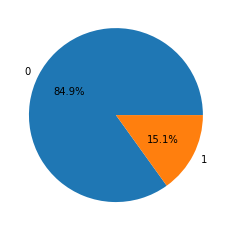

In [17]:
#Creating a pie chart
plt.pie(df['TenYearCHD'].value_counts(), labels=df['TenYearCHD'].value_counts().keys(),autopct='%.1f%%')
plt.show()

**Relation between numeric features and dependent variable**

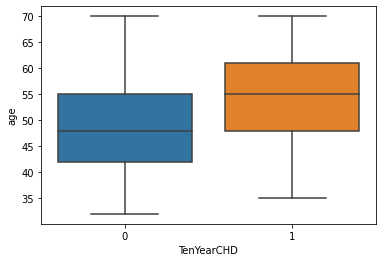

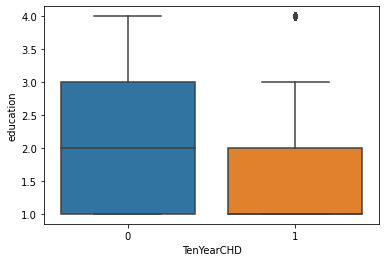

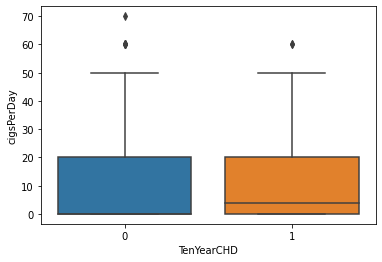

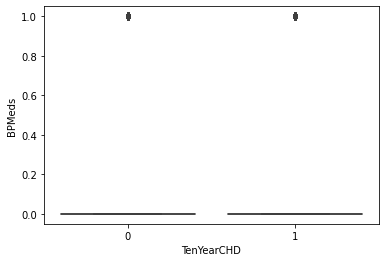

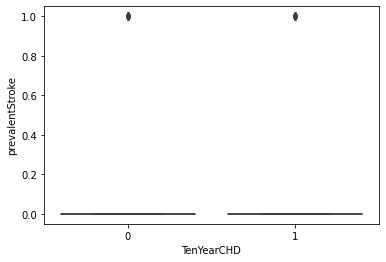

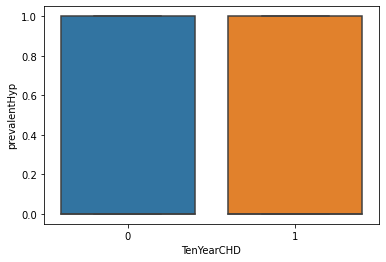

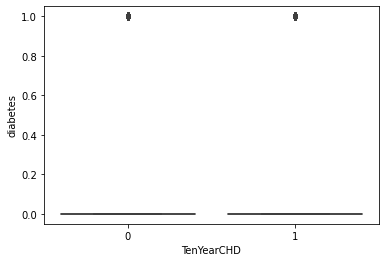

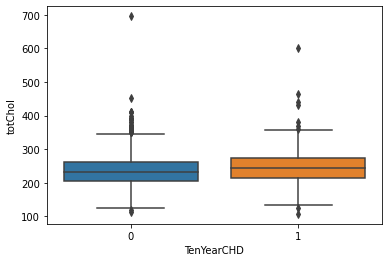

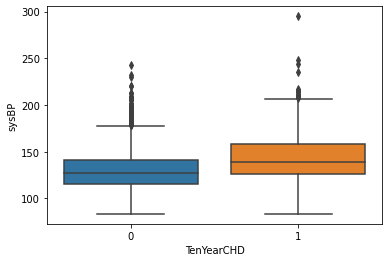

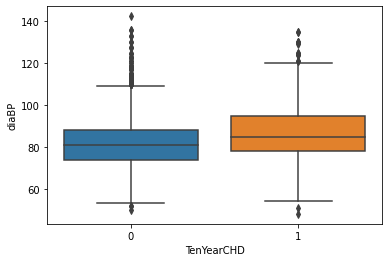

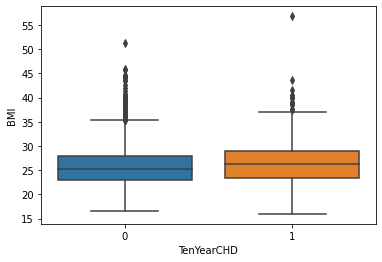

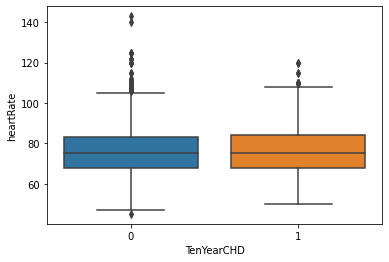

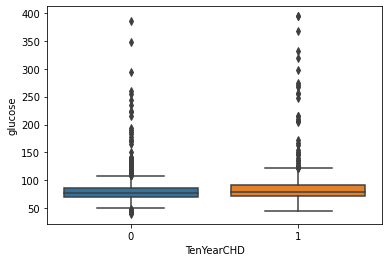

In [18]:
num_cols = [i for i in numeric_features if i not in ['TenYearCHD']]
for col in num_cols:
    sns.boxplot(y = col, x = df['TenYearCHD'].astype('category'), data=df)
    plt.show()

**Relationship between categorical features and dependent variable**

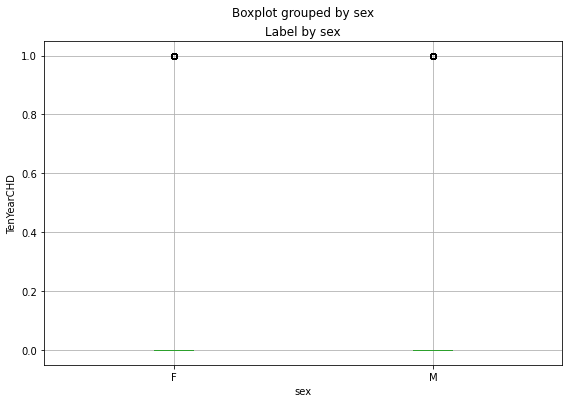

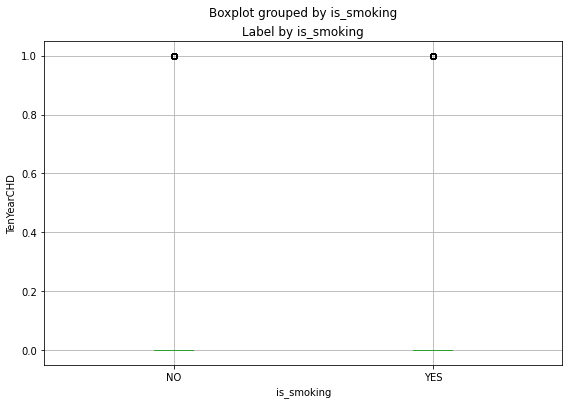

In [19]:
# Box plot of categorical features with respect to dependent variable
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'TenYearCHD', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("TenYearCHD")
plt.show()

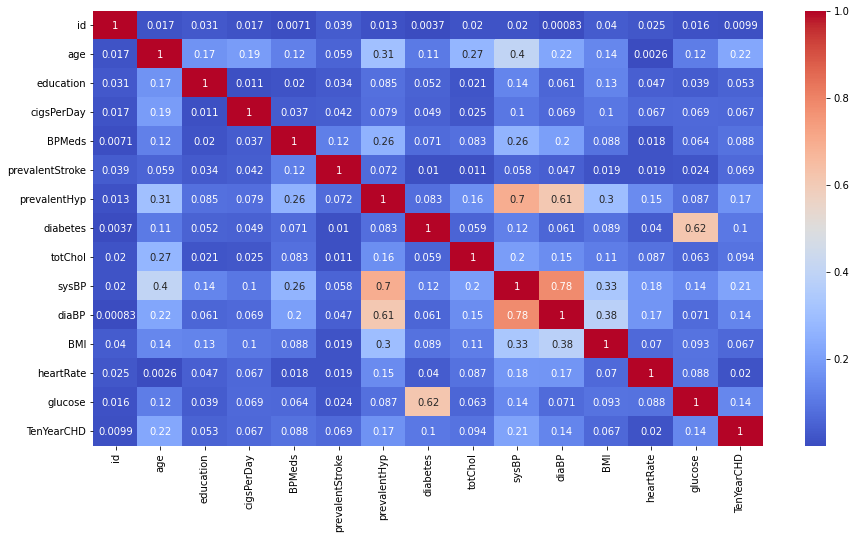

In [20]:
## Correlation matrix
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

In [21]:
# Converting categorical features to numeric 
#label encoding
encoders_nums = {"sex":{"M":1,"F":0} ,"is_smoking":{"YES":1,"NO":0}}
df= df.replace(encoders_nums)

In [22]:
df['BP'] = (df['diaBP']+df['sysBP'])/2

In [23]:
df1 = df[['age', 'cigsPerDay', 'BPMeds','sex',
          'prevalentHyp','prevalentStroke', 'diabetes', 
          'totChol','BMI', 'heartRate', 'glucose','BP','TenYearCHD']]

In [24]:
df1.head()

,age,cigsPerDay,BPMeds,sex,prevalentHyp,prevalentStroke,diabetes,totChol,BMI,heartRate,glucose,BP,TenYearCHD
0,64,3.0,0.0,0,0,0,0,221.0,NaN,90.0,80.0,116.50,1
1,36,0.0,0.0,1,1,0,0,212.0,29.77,72.0,75.0,133.00,0
2,46,10.0,0.0,0,0,0,0,250.0,20.35,88.0,94.0,93.50,0
3,50,20.0,0.0,1,1,0,0,233.0,28.26,68.0,94.0,123.00,1
4,64,30.0,0.0,0,0,0,0,241.0,26.42,70.0,77.0,110.75,0


In [25]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'BP'],
      dtype='object')

In [26]:
df1.isnull().sum()

age                  0
cigsPerDay          22
BPMeds              44
sex                  0
prevalentHyp         0
prevalentStroke      0
diabetes             0
totChol             38
BMI                 14
heartRate            1
glucose            304
BP                   0
TenYearCHD           0
dtype: int64

In [27]:
# defining imputer
imputer = KNNImputer(n_neighbors=1)
df2 = pd.DataFrame(imputer.fit_transform(df1.values))

In [28]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,64.0,3.0,0.0,0.0,0.0,0.0,0.0,221.0,25.90,90.0,80.0,116.50,1.0
1,36.0,0.0,0.0,1.0,1.0,0.0,0.0,212.0,29.77,72.0,75.0,133.00,0.0
2,46.0,10.0,0.0,0.0,0.0,0.0,0.0,250.0,20.35,88.0,94.0,93.50,0.0
3,50.0,20.0,0.0,1.0,1.0,0.0,0.0,233.0,28.26,68.0,94.0,123.00,1.0
4,64.0,30.0,0.0,0.0,0.0,0.0,0.0,241.0,26.42,70.0,77.0,110.75,0.0


In [29]:
df2 = df2.rename({0: 'age', 1: 'cigsPerDay',2: 'BPMeds', 3: 'sex',
                  4: 'prevalentHyp', 5: 'prevalentStroke',6: 'diabetes',
                  7: 'totChol',8: 'BMI', 9: 'heartRate', 10: 'glucose', 11: 'BP', 12: 'TenYearCHD'}, axis=1)

In [30]:
df2.head()

,age,cigsPerDay,BPMeds,sex,prevalentHyp,prevalentStroke,diabetes,totChol,BMI,heartRate,glucose,BP,TenYearCHD
0,64.0,3.0,0.0,0.0,0.0,0.0,0.0,221.0,25.90,90.0,80.0,116.50,1.0
1,36.0,0.0,0.0,1.0,1.0,0.0,0.0,212.0,29.77,72.0,75.0,133.00,0.0
2,46.0,10.0,0.0,0.0,0.0,0.0,0.0,250.0,20.35,88.0,94.0,93.50,0.0
3,50.0,20.0,0.0,1.0,1.0,0.0,0.0,233.0,28.26,68.0,94.0,123.00,1.0
4,64.0,30.0,0.0,0.0,0.0,0.0,0.0,241.0,26.42,70.0,77.0,110.75,0.0


In [31]:
X = df2.iloc[:,:12].apply(zscore)

In [32]:
y = df2['TenYearCHD'].values

In [33]:
X

,age,cigsPerDay,BPMeds,sex,prevalentHyp,prevalentStroke,diabetes,totChol,BMI,heartRate,glucose,BP
0,1.682783,-0.509729,-0.178783,-0.873425,-0.678658,-0.080821,-0.162295,-0.356867,0.025051,1.171459,-0.089609,0.537907
1,-1.576210,-0.762629,-0.178783,1.144919,1.473495,-0.080821,-0.162295,-0.556107,0.965560,-0.332453,-0.294170,1.551333
2,-0.412284,0.080371,-0.178783,-0.873425,-0.678658,-0.080821,-0.162295,0.285126,-1.323741,1.004358,0.483164,-0.874747
3,0.053287,0.923371,-0.178783,1.144919,1.473495,-0.080821,-0.162295,-0.091215,0.598591,-0.666656,0.483164,0.937136
4,1.682783,1.766371,-0.178783,-0.873425,-0.678658,-0.080821,-0.162295,0.085886,0.151424,-0.499554,-0.212346,0.184744
...,...,...,...,...,...,...,...,...,...,...,...,...
3385,1.217213,-0.762629,-0.178783,-0.873425,-0.678658,-0.080821,-0.162295,0.528640,0.846477,-0.499554,0.851374,-0.398744
3386,-0.412284,-0.762629,-0.178783,-0.873425,-0.678658,-0.080821,-0.162295,-0.843897,-0.932469,0.335953,0.074040,-1.765333
3387,-0.645069,-0.509729,-0.178783,1.144919,1.473495,-0.080821,-0.162295,2.543171,0.758988,-0.248902,-0.416907,2.073401
3388,1.217213,-0.762629,-0.178783,1.144919,1.473495,-0.080821,-0.162295,-1.020998,-0.677293,0.335953,0.114953,1.735592


In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=1)

# Logistic Regression

In [35]:
lr_clf = LogisticRegression(fit_intercept=True, max_iter=10000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [36]:
# Get the predicted probabilities
lr_train_preds = lr_clf.predict_proba(X_train)[:,1]
lr_test_preds = lr_clf.predict_proba(X_test)[:,1]

In [37]:
lr_train_preds

array([0.18104062, 0.22773016, 0.46406968, ..., 0.10506278, 0.05432536,
       0.14303131])

In [38]:
# Get the predicted classes
lr_train_class_preds = np.where(lr_clf.predict_proba(X_train)[:,1] > 0.15, 1, 0)
lr_test_class_preds = np.where(lr_clf.predict_proba(X_test)[:,1] > 0.15, 1, 0)

In [39]:
lr_train_class_preds

array([1, 1, 1, ..., 0, 0, 0])

In [40]:
# Train matrics
LR_train_Accuracy_Score = accuracy_score(y_train,lr_train_class_preds)
LR_train_Precision_Score = precision_score(y_train,lr_train_class_preds)
LR_train_Recall_Score = recall_score(y_train,lr_train_class_preds)
LR_train_F1_Score = f1_score(y_train,lr_train_class_preds)
LR_train_roc_auc = roc_auc_score(y_train,lr_train_preds)

In [41]:
# Test matrics
LR_test_Accuracy_Score = accuracy_score(y_test,lr_test_class_preds)
LR_test_Precision_Score = precision_score(y_test,lr_test_class_preds)
LR_test_Recall_Score = recall_score(y_test,lr_test_class_preds)
LR_test_F1_Score = f1_score(y_test,lr_test_class_preds)
LR_test_roc_auc = roc_auc_score(y_test,lr_test_preds)

In [42]:
LR_df=pd.DataFrame({'train_accuracy':LR_train_Accuracy_Score,'test_accuracy':LR_test_Accuracy_Score,
                      'train_precision':LR_train_Precision_Score,'test_precision':LR_test_Precision_Score,
                      'train_recall':LR_train_Recall_Score,'test_recall':LR_test_Recall_Score,
                      'train_f1score':LR_train_F1_Score,'test_f1score':LR_test_F1_Score,
                      'train_auc_roc':LR_train_roc_auc,'test_auc_roc':LR_test_roc_auc},index=['Logistic Regression'])

In [43]:
LR_df

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1score,test_f1score,train_auc_roc,test_auc_roc
Logistic Regression,0.661504,0.660767,0.264045,0.25641,0.681159,0.721649,0.380567,0.378378,0.726883,0.762106


In [44]:
#Logistic Regression Confusion matrix
confusion_matrix(y_test,lr_test_class_preds )

array([[378, 203],
       [ 27,  70]])

# Logistic Regression GridSearchCV

In [45]:
lr_cv_clf = LogisticRegression()

In [46]:
# Defining parameter list to perform GridSearchCV
param_dict = {'penalty': ['l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
# GridSearchCV
lr_grid = GridSearchCV(estimator=lr_cv_clf,param_grid = param_dict,scoring = 'recall', cv=5)
lr_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2']},
             scoring='recall')

In [47]:
# Getting best estimator from GridSearch
lr_grid.best_estimator_

LogisticRegression(C=1)

In [48]:
# Get the predicted probabilities
lr_cv_train_preds = lr_grid.predict_proba(X_train)[:,1]
lr_cv_test_preds = lr_grid.predict_proba(X_test)[:,1]

In [49]:
lr_cv_train_preds

array([0.18104062, 0.22773016, 0.46406968, ..., 0.10506278, 0.05432536,
       0.14303131])

In [50]:
# Get the predicted classes
lr_cv_train_class_preds = np.where(lr_grid.predict_proba(X_train)[:,1] > 0.15, 1, 0)
lr_cv_test_class_preds = np.where(lr_grid.predict_proba(X_test)[:,1] > 0.15, 1, 0)

In [51]:
lr_cv_train_class_preds

array([1, 1, 1, ..., 0, 0, 0])

In [52]:
# Train matrics
LR_cv_train_Accuracy_Score = accuracy_score(y_train,lr_cv_train_class_preds)
LR_cv_train_Precision_Score = precision_score(y_train,lr_cv_train_class_preds)
LR_cv_train_Recall_Score = recall_score(y_train,lr_cv_train_class_preds)
LR_cv_train_F1_Score = f1_score(y_train,lr_cv_train_class_preds)
LR_cv_train_roc_auc = roc_auc_score(y_train,lr_cv_train_preds)

In [53]:
# Test matrics
LR_cv_test_Accuracy_Score = accuracy_score(y_test,lr_cv_test_class_preds)
LR_cv_test_Precision_Score = precision_score(y_test,lr_cv_test_class_preds)
LR_cv_test_Recall_Score = recall_score(y_test,lr_cv_test_class_preds)
LR_cv_test_F1_Score = f1_score(y_test,lr_cv_test_class_preds)
LR_cv_test_roc_auc = roc_auc_score(y_test,lr_cv_test_preds)

In [54]:
LR_cv_df=pd.DataFrame({'train_accuracy':LR_cv_train_Accuracy_Score,'test_accuracy':LR_cv_test_Accuracy_Score,
                      'train_precision':LR_cv_train_Precision_Score,'test_precision':LR_cv_test_Precision_Score,
                      'train_recall':LR_cv_train_Recall_Score,'test_recall':LR_cv_test_Recall_Score,
                      'train_f1score':LR_cv_train_F1_Score,'test_f1score':LR_cv_test_F1_Score,
                      'train_auc_roc':LR_cv_train_roc_auc,'test_auc_roc':LR_cv_test_roc_auc},index=['Logistic Regression GridSearchCV'])

In [55]:
LR_cv_df

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1score,test_f1score,train_auc_roc,test_auc_roc
Logistic Regression GridSearchCV,0.661504,0.660767,0.264045,0.25641,0.681159,0.721649,0.380567,0.378378,0.726883,0.762106


In [56]:
#Logistic Regression GridSeach Confusion matrix
confusion_matrix(y_test,lr_cv_test_class_preds )

array([[378, 203],
       [ 27,  70]])

# Decision Tree

In [57]:
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [58]:
# Get the predicted classes
dt_train_preds = dt_clf.predict(X_train)
dt_test_preds = dt_clf.predict(X_test)

In [59]:
# Train matrics
dt_train_Accuracy_Score = accuracy_score(y_train,dt_train_preds)
dt_train_Precision_Score = precision_score(y_train,dt_train_preds)
dt_train_Recall_Score = recall_score(y_train,dt_train_preds)
dt_train_F1_Score = f1_score(y_train,dt_train_preds)
dt_train_roc_auc = roc_auc_score(y_train,dt_train_preds)

In [60]:
# Test matrics
dt_test_Accuracy_Score = accuracy_score(y_test,dt_test_preds)
dt_test_Precision_Score = precision_score(y_test,dt_test_preds)
dt_test_Recall_Score = recall_score(y_test,dt_test_preds)
dt_test_F1_Score = f1_score(y_test,dt_test_preds)
dt_test_roc_auc = roc_auc_score(y_test,dt_test_preds)

In [61]:
dt_df=pd.DataFrame({'train_accuracy':dt_train_Accuracy_Score,'test_accuracy':dt_test_Accuracy_Score,
                      'train_precision':dt_train_Precision_Score,'test_precision':dt_test_Precision_Score,
                      'train_recall':dt_train_Recall_Score,'test_recall':dt_test_Recall_Score,
                      'train_f1score':dt_train_F1_Score,'test_f1score':dt_test_F1_Score,
                      'train_auc_roc':dt_train_roc_auc,'test_auc_roc':dt_test_roc_auc},index=['Decision Tree'])

In [62]:
dt_df

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1score,test_f1score,train_auc_roc,test_auc_roc
Decision Tree,0.862832,0.851032,0.776316,0.416667,0.142512,0.103093,0.240816,0.165289,0.567557,0.539498


# Decision tree gridSearchCV

In [63]:
dt_cv_clf = DecisionTreeClassifier(random_state = 20)

In [64]:
# Defining parameter list to perform GridSearchCV
param_dict = {'ccp_alpha': [0.1, 0.01, 0.001],
              'criterion': ['gini', 'entropy'],
              'max_depth': [5, 6, 7, 8, 9],
              'max_features': ['auto', 'sqrt', 'log2']}
# GridSearchCV
dt_grid = GridSearchCV(estimator=dt_cv_clf,param_grid = param_dict,scoring = 'recall', cv=5)
dt_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=20),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='recall')

In [65]:
# Getting best estimator from GridSearch
dt_grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=20)

In [66]:
# Get the predicted classes
dt_cv_train_preds = dt_grid.predict(X_train)
dt_cv_test_preds = dt_grid.predict(X_test)

In [67]:
# Train matrics
dt_cv_train_Accuracy_Score = accuracy_score(y_train,dt_cv_train_preds)
dt_cv_train_Precision_Score = precision_score(y_train,dt_cv_train_preds)
dt_cv_train_Recall_Score = recall_score(y_train,dt_cv_train_preds)
dt_cv_train_F1_Score = f1_score(y_train,dt_cv_train_preds)
dt_cv_train_roc_auc = roc_auc_score(y_train,dt_cv_train_preds)

In [68]:
# Test matrics
dt_cv_test_Accuracy_Score = accuracy_score(y_test,dt_cv_test_preds)
dt_cv_test_Precision_Score = precision_score(y_test,dt_cv_test_preds)
dt_cv_test_Recall_Score = recall_score(y_test,dt_cv_test_preds)
dt_cv_test_F1_Score = f1_score(y_test,dt_cv_test_preds)
dt_cv_test_roc_auc = roc_auc_score(y_test,dt_cv_test_preds)

In [69]:
dt_cv_df=pd.DataFrame({'train_accuracy':dt_cv_train_Accuracy_Score,'test_accuracy':dt_cv_test_Accuracy_Score,
                      'train_precision':dt_cv_train_Precision_Score,'test_precision':dt_cv_test_Precision_Score,
                      'train_recall':dt_cv_train_Recall_Score,'test_recall':dt_cv_test_Recall_Score,
                      'train_f1score':dt_cv_train_F1_Score,'test_f1score':dt_cv_test_F1_Score,
                      'train_auc_roc':dt_cv_train_roc_auc,'test_auc_roc':dt_cv_test_roc_auc},index=['Decision Tree GridSearchCV'])

In [70]:
dt_cv_df

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1score,test_f1score,train_auc_roc,test_auc_roc
Decision Tree GridSearchCV,0.877212,0.831858,0.87156,0.242424,0.229469,0.082474,0.363289,0.123077,0.611688,0.519722


# Random Forest

In [71]:
rf_cv_clf = RandomForestClassifier(random_state = 20)

In [72]:
# Defining parameter list to perform GridSearchCV
param_dict = {'n_estimators': [200,300,400],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini', 'entropy']}
# GridSearchCV
rf_grid = GridSearchCV(estimator=rf_cv_clf,param_grid = param_dict,scoring = 'recall', cv=5)
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=20),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 400]},
             scoring='recall')

In [73]:
# Getting best estimator from GridSearch
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=400, random_state=20)

In [74]:
# Get the predicted classes
rf_cv_train_preds = rf_grid.predict(X_train)
rf_cv_test_preds = rf_grid.predict(X_test)

In [75]:
# Train matrics
rf_cv_train_Accuracy_Score = accuracy_score(y_train,rf_cv_train_preds)
rf_cv_train_Precision_Score = precision_score(y_train,rf_cv_train_preds)
rf_cv_train_Recall_Score = recall_score(y_train,rf_cv_train_preds)
rf_cv_train_F1_Score = f1_score(y_train,rf_cv_train_preds)
rf_cv_train_roc_auc = roc_auc_score(y_train,rf_cv_train_preds)

In [76]:
# Test matrics
rf_cv_test_Accuracy_Score = accuracy_score(y_test,rf_cv_test_preds)
rf_cv_test_Precision_Score = precision_score(y_test,rf_cv_test_preds)
rf_cv_test_Recall_Score = recall_score(y_test,rf_cv_test_preds)
rf_cv_test_F1_Score = f1_score(y_test,rf_cv_test_preds)
rf_cv_test_roc_auc = roc_auc_score(y_test,rf_cv_test_preds)

In [77]:
rf_cv_df=pd.DataFrame({'train_accuracy':rf_cv_train_Accuracy_Score,'test_accuracy':rf_cv_test_Accuracy_Score,
                      'train_precision':rf_cv_train_Precision_Score,'test_precision':rf_cv_test_Precision_Score,
                      'train_recall':rf_cv_train_Recall_Score,'test_recall':rf_cv_test_Recall_Score,
                      'train_f1score':rf_cv_train_F1_Score,'test_f1score':rf_cv_test_F1_Score,
                      'train_auc_roc':rf_cv_train_roc_auc,'test_auc_roc':rf_cv_test_roc_auc},index=['RandomForest GridSearchCV'])

In [78]:
rf_cv_df

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1score,test_f1score,train_auc_roc,test_auc_roc
RandomForest GridSearchCV,0.874631,0.858407,1.0,0.538462,0.178744,0.072165,0.303279,0.127273,0.589372,0.530919


# XGBoost

In [79]:
xgb_cv_clf = xgb.XGBClassifier()

In [80]:
# Defining parameter list to perform GridSearchCV
param_dict = {'gamma': [0.1,0.2,0.4,0.8,1.6, 200],
              'learning_rate': [0.01, 0.03, 0.1, 0.4, 0.5, 0.6],
              'max_depth': [5,6,7,10,11,12],
              'n_estimators': [50,65,100,115,130,150],
}
# GridSearchCV
xgb_grid = GridSearchCV(estimator=xgb_cv_clf,param_grid = param_dict, cv=3)
xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'gamma': [0.1, 0.2, 0.4, 0.8, 1.6, 200],
                         'learning_rate': [0.01, 0.03, 0.1, 0.4, 0.5, 0.6],
                         'max_depth': [5, 6, 7, 10, 11, 12],
                         'n_estimators': [50, 65, 100, 115, 130, 150]})

In [81]:
# Getting best estimator from GridSearch
xgb_grid.best_estimator_

XGBClassifier(gamma=1.6, learning_rate=0.01, max_depth=5, n_estimators=115)

In [82]:
# Get the predicted classes
xgb_cv_train_preds = xgb_grid.predict(X_train)
xgb_cv_test_preds = xgb_grid.predict(X_test)

In [83]:
print(classification_report(y_train, xgb_cv_train_preds))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      2298
         1.0       0.93      0.10      0.19       414

    accuracy                           0.86      2712
   macro avg       0.90      0.55      0.56      2712
weighted avg       0.87      0.86      0.81      2712



In [84]:
print(classification_report(y_test, xgb_cv_test_preds))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       581
         1.0       0.38      0.05      0.09        97

    accuracy                           0.85       678
   macro avg       0.62      0.52      0.51       678
weighted avg       0.79      0.85      0.80       678



In [85]:
# Train matrics
xgb_cv_train_Accuracy_Score = accuracy_score(y_train,xgb_cv_train_preds)
xgb_cv_train_Precision_Score = precision_score(y_train,xgb_cv_train_preds)
xgb_cv_train_Recall_Score = recall_score(y_train,xgb_cv_train_preds)
xgb_cv_train_F1_Score = f1_score(y_train,xgb_cv_train_preds)
xgb_cv_train_roc_auc = roc_auc_score(y_train,xgb_cv_train_preds)

In [86]:
# Test matrics
xgb_cv_test_Accuracy_Score = accuracy_score(y_test,xgb_cv_test_preds)
xgb_cv_test_Precision_Score = precision_score(y_test,xgb_cv_test_preds)
xgb_cv_test_Recall_Score = recall_score(y_test,xgb_cv_test_preds)
xgb_cv_test_F1_Score = f1_score(y_test,xgb_cv_test_preds)
xgb_cv_test_roc_auc = roc_auc_score(y_test,xgb_cv_test_preds)

In [87]:
xgb_cv_df=pd.DataFrame({'train_accuracy':xgb_cv_train_Accuracy_Score,'test_accuracy':xgb_cv_test_Accuracy_Score,
                      'train_precision':xgb_cv_train_Precision_Score,'test_precision':xgb_cv_test_Precision_Score,
                      'train_recall':xgb_cv_train_Recall_Score,'test_recall':xgb_cv_test_Recall_Score,
                      'train_f1score':xgb_cv_train_F1_Score,'test_f1score':xgb_cv_test_F1_Score,
                      'train_auc_roc':xgb_cv_train_roc_auc,'test_auc_roc':xgb_cv_test_roc_auc},index=['XGBoost'])

In [88]:
xgb_cv_df

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1score,test_f1score,train_auc_roc,test_auc_roc
XGBoost,0.862094,0.852507,0.934783,0.384615,0.103865,0.051546,0.186957,0.090909,0.55128,0.518889
